In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import numpy as np
import random
import argparse
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader, random_split
import utils

import models
import training

NUM_CLASSES = 10


In [2]:
# MNIST TRAINING

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root="./data", train=True, download=False, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=False, transform=transform)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
dl_train = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
dl_val = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=True)
dl_test = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.SelfSupervised_MNIST(latent_dim=128)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

checkpoints_path = "encoder_mnist.pth"
trainer = training.SelfSupervisedTrainer(model, dl_train, dl_val, loss_fn, optimizer, device)
trainer.train(num_epochs=10, checkpoints=checkpoints_path)

Epoch [1/10], Train Loss: 0.0325, Val Loss: 0.0077
Epoch [2/10], Train Loss: 0.0056, Val Loss: 0.0044
Epoch [3/10], Train Loss: 0.0037, Val Loss: 0.0034
Epoch [4/10], Train Loss: 0.0029, Val Loss: 0.0028
Epoch [5/10], Train Loss: 0.0025, Val Loss: 0.0024
Epoch [6/10], Train Loss: 0.0022, Val Loss: 0.0022
Epoch [7/10], Train Loss: 0.0020, Val Loss: 0.0021
Epoch [8/10], Train Loss: 0.0018, Val Loss: 0.0018
Epoch [9/10], Train Loss: 0.0017, Val Loss: 0.0017
Epoch [10/10], Train Loss: 0.0016, Val Loss: 0.0016


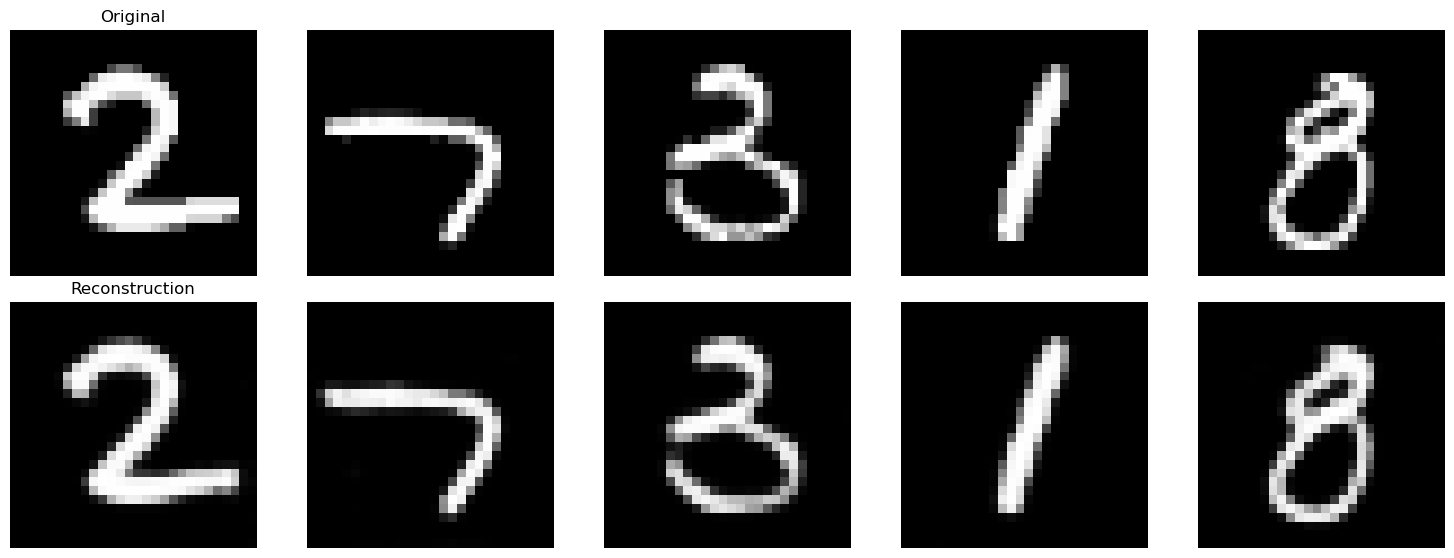

In [3]:

utils.showReconstructions(model, test_dataset, device)

In [4]:
encoder = models.SelfSupervised_MNIST(latent_dim=128).encoder
encoder.load_state_dict(torch.load("encoder_mnist.pth"))
encoder.to(device)
encoder.eval()  

classifier = models.Classifier(latent_dim=128, num_classes=10).to(device)
fn_loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

checkpoints_path = "classifier_mnist.pth"
trainer = training.ClassifierTrainer(classifier, encoder, dl_train, dl_val, fn_loss, optimizer, device)
trainer.train(num_epochs=10, checkpoints=checkpoints_path)

Epoch [1/10], Loss: 0.4088, Accuracy: 87.98, Validation Accuracy: 93.81 %
Epoch [2/10], Loss: 0.1726, Accuracy: 95.00, Validation Accuracy: 95.66 %
Epoch [3/10], Loss: 0.1253, Accuracy: 96.40, Validation Accuracy: 96.18 %
Epoch [4/10], Loss: 0.1000, Accuracy: 97.08, Validation Accuracy: 96.73 %
Epoch [5/10], Loss: 0.0845, Accuracy: 97.52, Validation Accuracy: 96.89 %
Epoch [6/10], Loss: 0.0717, Accuracy: 97.89, Validation Accuracy: 96.84 %
Epoch [7/10], Loss: 0.0633, Accuracy: 98.20, Validation Accuracy: 97.08 %
Epoch [8/10], Loss: 0.0568, Accuracy: 98.35, Validation Accuracy: 97.05 %
Epoch [9/10], Loss: 0.0515, Accuracy: 98.48, Validation Accuracy: 97.26 %
Epoch [10/10], Loss: 0.0468, Accuracy: 98.61, Validation Accuracy: 97.14 %


In [5]:

model = models.ClassificationGuided_MNIST().to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()
trainer = training.ClassificationGuidedTrainer(model,  dl_train, dl_val, dl_test, loss_fn, optimizer, device)
checkpoints_path = "guided_mnist.pth"

trainer.train(num_epochs=10, checkpoints=checkpoints_path)


Epoch [1/10], Loss: 0.3992, Accuracy: 87.88, Validation Accuracy: 94.87%
Epoch [2/10], Loss: 0.1085, Accuracy: 96.74, Validation Accuracy: 97.02%
Epoch [3/10], Loss: 0.0642, Accuracy: 98.05, Validation Accuracy: 97.62%
Epoch [4/10], Loss: 0.0460, Accuracy: 98.55, Validation Accuracy: 97.50%
Epoch [5/10], Loss: 0.0338, Accuracy: 98.96, Validation Accuracy: 97.95%
Epoch [6/10], Loss: 0.0272, Accuracy: 99.09, Validation Accuracy: 98.22%
Epoch [7/10], Loss: 0.0202, Accuracy: 99.36, Validation Accuracy: 98.26%
Epoch [8/10], Loss: 0.0155, Accuracy: 99.52, Validation Accuracy: 98.28%
Epoch [9/10], Loss: 0.0149, Accuracy: 99.53, Validation Accuracy: 98.43%
Epoch [10/10], Loss: 0.0119, Accuracy: 99.62, Validation Accuracy: 98.17%


In [6]:
# CIFAR10 TRAINING


transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=False)
test_dataset = datasets.CIFAR10(root="./data", train=False, transform=transform, download=False)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
dl_train = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
dl_val = torch.utils.data.DataLoader(val_dataset, batch_size=100, shuffle=True)
dl_test = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.SelfSupervised_CIFAR10(latent_dim=128)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

checkpoints_path = "encoder_cifar10.pth"
trainer = training.SelfSupervisedTrainer(model, dl_train, dl_val, loss_fn, optimizer, device)
trainer.train(num_epochs=10, checkpoints=checkpoints_path)

Epoch [1/10], Train Loss: 0.0338, Val Loss: 0.0178
Epoch [2/10], Train Loss: 0.0145, Val Loss: 0.0113
Epoch [3/10], Train Loss: 0.0105, Val Loss: 0.0094
Epoch [4/10], Train Loss: 0.0090, Val Loss: 0.0084
Epoch [5/10], Train Loss: 0.0080, Val Loss: 0.0077
Epoch [6/10], Train Loss: 0.0072, Val Loss: 0.0067
Epoch [7/10], Train Loss: 0.0066, Val Loss: 0.0063
Epoch [8/10], Train Loss: 0.0062, Val Loss: 0.0060
Epoch [9/10], Train Loss: 0.0059, Val Loss: 0.0059
Epoch [10/10], Train Loss: 0.0057, Val Loss: 0.0057


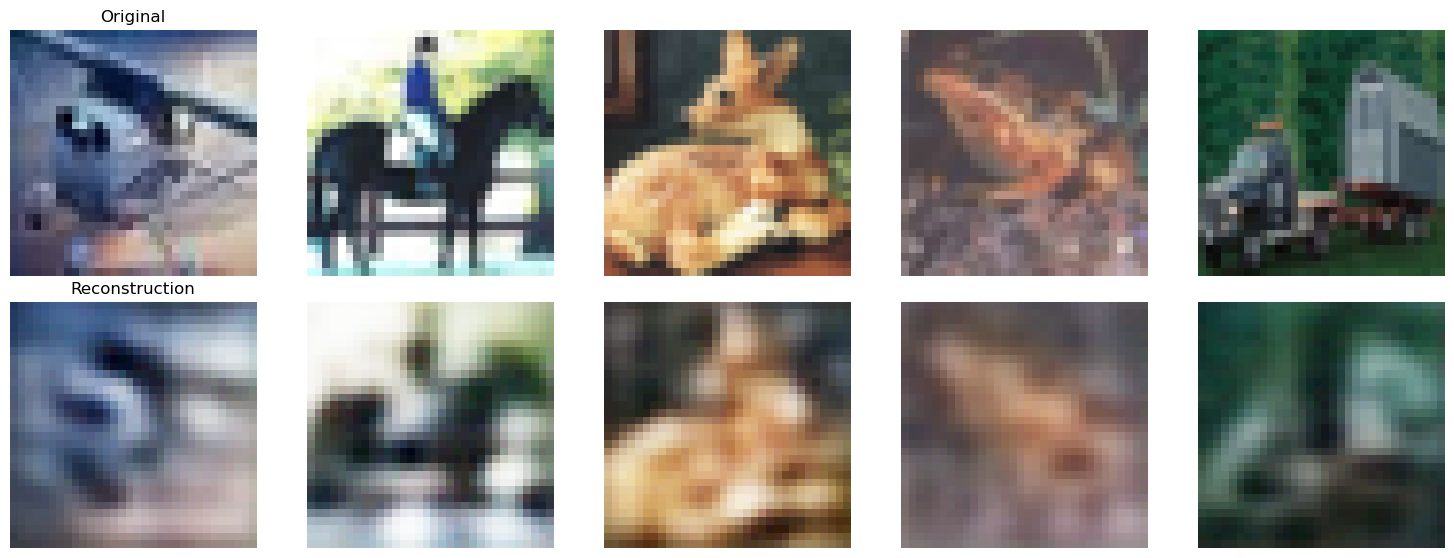

In [7]:

utils.showReconstructions(model, test_dataset, device)

In [8]:

encoder = models.SelfSupervised_CIFAR10(latent_dim=128).encoder
encoder.load_state_dict(torch.load("encoder_cifar10.pth"))
encoder.to(device)
encoder.eval()  

classifier = models.Classifier(latent_dim=128, num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

transform = transforms.Compose([transforms.ToTensor()])

checkpoints_path = "classifier_cifar10.pth"
trainer = training.ClassifierTrainer(classifier, encoder, dl_train, dl_test, criterion, optimizer, device)
trainer.train(num_epochs=10, checkpoints=checkpoints_path)


Epoch [1/10], Loss: 1.8297, Accuracy: 35.34, Validation Accuracy: 41.45 %
Epoch [2/10], Loss: 1.6224, Accuracy: 42.86, Validation Accuracy: 44.46 %
Epoch [3/10], Loss: 1.5502, Accuracy: 45.83, Validation Accuracy: 46.16 %
Epoch [4/10], Loss: 1.5019, Accuracy: 47.31, Validation Accuracy: 47.10 %
Epoch [5/10], Loss: 1.4665, Accuracy: 48.58, Validation Accuracy: 47.82 %
Epoch [6/10], Loss: 1.4366, Accuracy: 49.79, Validation Accuracy: 48.68 %
Epoch [7/10], Loss: 1.4143, Accuracy: 50.10, Validation Accuracy: 48.80 %
Epoch [8/10], Loss: 1.3963, Accuracy: 50.80, Validation Accuracy: 49.29 %
Epoch [9/10], Loss: 1.3783, Accuracy: 51.35, Validation Accuracy: 49.29 %
Epoch [10/10], Loss: 1.3637, Accuracy: 51.99, Validation Accuracy: 49.32 %


In [9]:

model = models.ClassificationGuided_CIFAR10().to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()
trainer = training.ClassificationGuidedTrainer(model,  dl_train, dl_val, dl_test, loss_fn, optimizer, device)
checkpoints_path = "guided_cifar10.pth"

trainer.train(num_epochs=10, checkpoints=checkpoints_path)

Epoch [1/10], Loss: 1.7102, Accuracy: 37.26, Validation Accuracy: 47.20%
Epoch [2/10], Loss: 1.3712, Accuracy: 50.25, Validation Accuracy: 52.42%
Epoch [3/10], Loss: 1.2236, Accuracy: 55.97, Validation Accuracy: 58.01%
Epoch [4/10], Loss: 1.1060, Accuracy: 60.58, Validation Accuracy: 59.40%
Epoch [5/10], Loss: 1.0102, Accuracy: 64.06, Validation Accuracy: 60.88%
Epoch [6/10], Loss: 0.9283, Accuracy: 66.81, Validation Accuracy: 63.71%
Epoch [7/10], Loss: 0.8477, Accuracy: 69.73, Validation Accuracy: 64.07%
Epoch [8/10], Loss: 0.7808, Accuracy: 72.27, Validation Accuracy: 64.42%
Epoch [9/10], Loss: 0.7066, Accuracy: 75.09, Validation Accuracy: 65.04%
Epoch [10/10], Loss: 0.6412, Accuracy: 77.21, Validation Accuracy: 65.77%
